<a href="https://colab.research.google.com/github/syam-babu/Titanic-Machine-Learning-from-Disaster/blob/main/Titanic_Survival_prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#plt.style.use('seaborn-whitegrid')

% matplotlib inline

In [2]:
test = pd.read_csv('/content/drive/My Drive/test.csv')
train = pd.read_csv('/content/drive/My Drive/train.csv')
test.head()

FileNotFoundError: ignored

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## creating 2 dataframe for neumerical values and catagorical values
classifier_df = pd.DataFrame()
numerical_df = pd.DataFrame()

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Since there is too many missing values in 'Cabin', its ok to drop the entire column.**
**In train data 'PassengerId' did not have any significance in our prediction so we are droping that also**


In [ ]:
train.drop(['Cabin','PassengerId','Ticket'],axis=1,inplace=True)
test.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


**Goal now is to fill the missing 'Age' data with optimal value. Here i group them on the basis of 'Sex' & 'Pclass' the replace the missing values of 'Age' with mean**

In [ ]:
grp_mean = train.groupby(['Pclass','Sex']) 
grp_null = train[train['Age'].isnull()].groupby(['Pclass','Sex']) 


In [ ]:
test_grp_mean = test.groupby(['Pclass','Sex']) 
test_grp_null = test.groupby(['Pclass','Sex'])

In [ ]:
###Grouped train & test dataset by 'pclass' and 'sex'. 'grp_null' & 'test_grp_null' is same grouping but only on rows with age is nan##

In [ ]:
age_mean_grp = grp_mean['Age'].apply(pd.Series.mean)
test_age_mean_grp = test_grp_mean['Age'].apply(pd.Series.mean)
## Mean of age in those groups

In [ ]:
def ageEstimate(k,age_mean):
  age_x = age_mean[k]
  return age_x 



for key, grp in grp_null:
  age = ageEstimate(key,age_mean_grp)
  for i in grp.index.values:
    train.loc[train.index.values==i,'Age'] = age

for key, grp in test_grp_null:
  age = ageEstimate(key,test_age_mean_grp)
  for i in grp.index.values:
    test.loc[test.index.values==i,'Age'] = age
## Age of both test and train data is replaced ##

In [ ]:
test.loc[test['Fare'].isnull(),'Fare']=2

In [ ]:
test.index

RangeIndex(start=0, stop=418, step=1)

**Alloting dummy variables to 'Embarked' and 'Sex'**

In [ ]:

train.dropna(inplace=True)

In [ ]:
train['Sex_male'] = pd.get_dummies(train.Sex,drop_first=True,prefix='Sex')

In [ ]:
test['Sex_male'] = pd.get_dummies(test.Sex,drop_first=True,prefix='Sex')

In [ ]:
embarked_test = pd.get_dummies(test.Embarked,drop_first=True,prefix='Embarked')
test = pd.concat([test,embarked_test],axis=1)
embarked_train = pd.get_dummies(train.Embarked,drop_first=True,prefix='Embarked')
train = pd.concat([train,embarked_train],axis=1)

In [ ]:
test.drop(['Sex','Embarked'],inplace=True,axis=1)
train.drop(['Sex','Embarked'],inplace=True,axis=1)

In [ ]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

**Analising fare, age, name**

In [ ]:
train.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


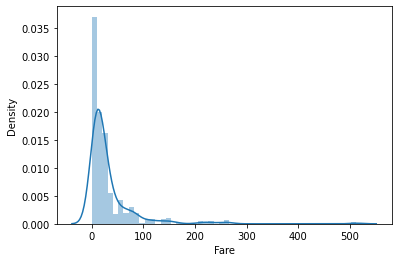

In [ ]:
sns.distplot(train.Fare)

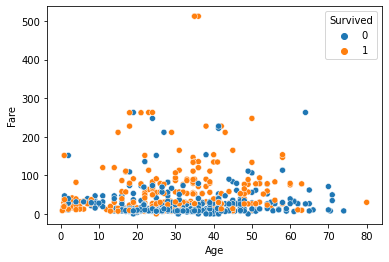

In [ ]:
sns.scatterplot(y='Fare',x='Age',hue='Survived',data=train)

**Assigning dummy variable to fare and age**

In [ ]:
def age_dummy(dataset):
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
  return dataset

train = age_dummy(train)
test = age_dummy(test)

In [ ]:
train

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1.0,1,0,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0,1,0,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",1.0,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",2.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",2.0,0,0,13.0000,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",1.0,0,0,30.0000,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,1,2,23.4500,0,0,1
889,1,1,"Behr, Mr. Karl Howell",1.0,0,0,30.0000,1,0,0


In [ ]:
def fare_dummy(dataset):
  dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
  dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
  return dataset

train=fare_dummy(train)
test=fare_dummy(test)

In [ ]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [ ]:
X = train.drop('Survived',axis=1)
Y = train.Survived

**Splitting train data and training the model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=1)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(y_test,y_pred)

In [ ]:
score*100

81.46067415730337

In [ ]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1.0,1,0,0.0,1,0,1
1,1,1,3.0,1,0,2.0,0,0,0
2,1,3,1.0,0,0,0.0,0,0,1
3,1,1,2.0,1,0,2.0,0,0,1
4,0,3,2.0,0,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,2.0,0,0,0.0,1,0,1
887,1,1,1.0,0,0,1.0,0,0,1
888,0,3,1.0,1,2,1.0,0,0,1
889,1,1,1.0,0,0,1.0,1,0,0


**Prediction on test data**

In [ ]:
lr = LogisticRegression(class_weight='balanced',random_state=1)
lr.fit(X,Y)
test_data = test.drop("PassengerId", axis=1).copy()
final_pred = lr.predict(test_data)
final_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':final_pred})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('submission.csv', index=False)


In [ ]:
sub = pd.read_csv('submission.csv')
sub.index

RangeIndex(start=0, stop=418, step=1)